# Let me get this straight

[![GitHub License](https://img.shields.io/github/license/Dragon1573/PyChallenge-Tips?color=important&label=Licence&style=flat-square)](https://github.com/Dragon1573/PyChallenge-Tips/blob/master/LICENSE)
[![Jump to Level 16](https://img.shields.io/badge/Jump%20to-Level%2016-blue?style=flat-square)](http://www.pythonchallenge.com/pc/return/mozart.html)

<center><img src="../../resources/imgs/Quiz16-1.png" /></center>

&emsp;&emsp;关卡图片中存在大量离散的紫色短线，而关卡标题内容为**让我把它变直**。是不是将每一行像素的紫色细线按列方向对齐，就能还原最初的图像了？

In [1]:
from requests import post
from io import BytesIO
from PIL import Image

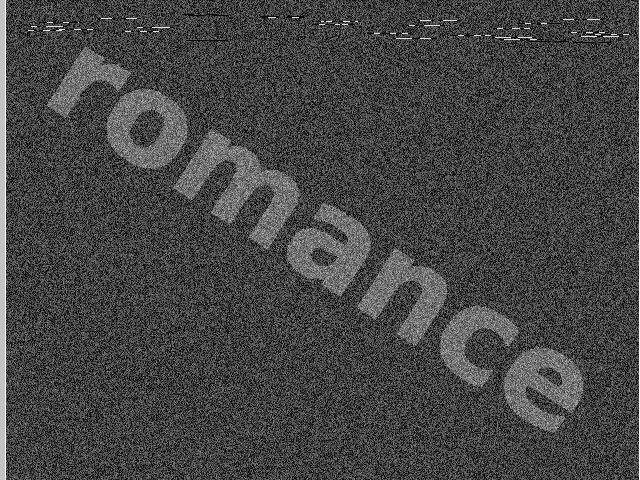

In [2]:
# 爬取原图
response = post(
    'http://www.pythonchallenge.com/pc/return/mozart.gif',
    headers={'Authorization': 'Basic aHVnZTpmaWxl'}
)
# 打开原图
raw = Image.open(BytesIO(response.content))
# 创建还原图
new = Image.new(raw.mode, raw.size, None)
# 对于每一行
for y in range(raw.size[1]):
    # 获取一行的图像
    row = [raw.getpixel((x, y)) for x in range(raw.size[0])]
    # 紫色像素的色彩值是195，每行占4个像素点
    # 只用匹配首个紫色像素，将紫色选区移动到图片最左侧即可
    seperator = row.index(195)
    row = row[seperator:] + row[:seperator]
    # 写入还原图中
    for x in range(raw.size[0]):
        new.putpixel((x, y), row[x])
display(new)

&emsp;&emsp;图像左上角的关卡编号`16`被打散，但下方的花屏区被还原。尽管`PIL.Image`的图像还原操作使图像色彩丢失，但我们仍能清楚地看到关键词`romance`。因此，下一关的链接为<http://www.pythonchallenge.com/pc/return/romance.html>。